# Unit 5 - Financial Planning


In [5]:
pip install alpaca_trade_api

In [6]:
pip install hvplot

In [7]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import hvplot

%matplotlib inline

In [8]:
# Load .env enviroment variables
load_dotenv()

True

In [9]:
# The average household income for each member of the credit union is $12,000.
# Every union member has a savings portfolio composed of cryptocurrencies, stocks and bonds:
# Assume the following amount of crypto assets: 1.2 BTC and 5.3 ETH.
# Assume the following amount of shares in stocks and bonds: 50 SPY (stocks) and 200 AGG (bonds).

### Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [10]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2 
my_eth = 5.3 

In [11]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [12]:
btc_pric = requests.get(btc_url).json()
eth_pric = requests.get(eth_url).json()

In [13]:
# Fetch current BTC price
# YOUR CODE HERE!

btc_price = btc_pric['data']['1']['quotes']['USD']['price']
btc_price

33656.0

In [14]:
# Fetch current ETH price
# YOUR CODE HERE!]

eth_price = eth_pric['data']['1027']['quotes']['USD']['price']
eth_price

2536.27

In [15]:
# Compute current value of my crpto
# YOUR CODE HERE!

my_crypto = (eth_price * my_eth) + (btc_price * my_btc)
my_crypto

my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40387.20
The current value of your 5.3 ETH is $13442.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Current amount of shares
# YOUR CODE HERE!

my_agg = 200 
my_spy = 50

In [17]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [23]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2021-06-07").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

agg_close_price = (df_portfolio["AGG"]["close"])
spy_close_price = (df_portfolio["SPY"]["close"])

# Preview DataFrame
# YOUR CODE HERE!

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $time
2021-01-14 00:00:00-05:00    117.150
2021-01-15 00:00:00-05:00    117.260
2021-01-19 00:00:00-05:00    117.410
2021-01-20 00:00:00-05:00    117.400
2021-01-21 00:00:00-05:00    117.260
                              ...   
2021-06-02 00:00:00-04:00    114.485
2021-06-03 00:00:00-04:00    114.210
2021-06-04 00:00:00-04:00    114.665
2021-06-07 00:00:00-04:00    114.595
2021-06-08 00:00:00-04:00    114.820
Name: close, Length: 100, dtype: float64
Current SPY closing price: $time
2021-01-14 00:00:00-05:00    378.45
2021-01-15 00:00:00-05:00    375.68
2021-01-19 00:00:00-05:00    378.63
2021-01-20 00:00:00-05:00    383.86
2021-01-21 00:00:00-05:00    384.20
                              ...  
2021-06-02 00:00:00-04:00    420.38
2021-06-03 00:00:00-04:00    418.86
2021-06-04 00:00:00-04:00    422.57
2021-06-07 00:00:00-04:00    422.23
2021-06-08 00:00:00-04:00    422.27
Name: close, Length: 100, dtype: float64


In [24]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $time
2021-01-14 00:00:00-05:00    117.150
2021-01-15 00:00:00-05:00    117.260
2021-01-19 00:00:00-05:00    117.410
2021-01-20 00:00:00-05:00    117.400
2021-01-21 00:00:00-05:00    117.260
                              ...   
2021-06-02 00:00:00-04:00    114.485
2021-06-03 00:00:00-04:00    114.210
2021-06-04 00:00:00-04:00    114.665
2021-06-07 00:00:00-04:00    114.595
2021-06-08 00:00:00-04:00    114.820
Name: close, Length: 100, dtype: float64
Current SPY closing price: $time
2021-01-14 00:00:00-05:00    378.45
2021-01-15 00:00:00-05:00    375.68
2021-01-19 00:00:00-05:00    378.63
2021-01-20 00:00:00-05:00    383.86
2021-01-21 00:00:00-05:00    384.20
                              ...  
2021-06-02 00:00:00-04:00    420.38
2021-06-03 00:00:00-04:00    418.86
2021-06-04 00:00:00-04:00    422.57
2021-06-07 00:00:00-04:00    422.23
2021-06-08 00:00:00-04:00    422.27
Name: close, Length: 100, dtype: float64


In [26]:
# Compute the current value of shares
# YOUR CODE HERE!

my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $time
2021-01-14 00:00:00-05:00    18922.5
2021-01-15 00:00:00-05:00    18784.0
2021-01-19 00:00:00-05:00    18931.5
2021-01-20 00:00:00-05:00    19193.0
2021-01-21 00:00:00-05:00    19210.0
                              ...   
2021-06-02 00:00:00-04:00    21019.0
2021-06-03 00:00:00-04:00    20943.0
2021-06-04 00:00:00-04:00    21128.5
2021-06-07 00:00:00-04:00    21111.5
2021-06-08 00:00:00-04:00    21113.5
Name: close, Length: 100, dtype: float64
The current value of your 200 AGG shares is $time
2021-01-14 00:00:00-05:00    23430.0
2021-01-15 00:00:00-05:00    23452.0
2021-01-19 00:00:00-05:00    23482.0
2021-01-20 00:00:00-05:00    23480.0
2021-01-21 00:00:00-05:00    23452.0
                              ...   
2021-06-02 00:00:00-04:00    22897.0
2021-06-03 00:00:00-04:00    22842.0
2021-06-04 00:00:00-04:00    22933.0
2021-06-07 00:00:00-04:00    22919.0
2021-06-08 00:00:00-04:00    22964.0
Name: close, Length: 100, dtype: float64


### Savings Health Analysis

In [30]:
# Set monthly household income
# YOUR CODE HERE!

crypto_value = my_btc_value + my_eth_value
stocks_value = my_agg_value + my_spy_value

# Create savings DataFrame
# YOUR CODE HERE!

portfolio = [{"crypto": crypto_value,
              "shares": stocks_value }]

# Display savings DataFrame
df_savings1 = pd.DataFrame(portfolio)
    
df_savings = df_savings1.transpose(copy=False)
df_savings.rename(columns={"0": "Amount"})
df_savings.head()

,0
crypto,53829.431
shares,time 2021-01-14 00:00:00-05:00 42352.5 2021...


In [61]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y=0, title = "compisition of personal savings")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [64]:
monthly_income = 12000

# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

total_savings = df_savings[0].sum()

# Validate saving health
# YOUR CODE HERE!

if total_savings > emergency_fund:
    print("yay!! you have enough money in your rainy-day fund.")
elif total_savings < emergency_fund:
    print(f"You are $ {emergency_fund - total_savings} away from reaching your goal of saving at least 3 times your monthly expenses")
else:
    print("yay! You have reached your goal of saving at least 3 times your monthly expenses")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [36]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [37]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  298252778  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.16  261233795  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  302880969  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [39]:
# Printing the simulation input data
# YOUR CODE HERE!

MC_dist.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [40]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.018110e+00,9.982184e-01,1.013707e+00,1.014217e+00,1.021925e+00,9.634178e-01,1.017608e+00,9.837426e-01,9.838043e-01,1.000762e+00,...,9.912889e-01,9.920236e-01,9.809039e-01,9.986165e-01,1.012235e+00,1.029371e+00,1.002192e+00,9.896135e-01,1.006003e+00,9.826866e-01
2,1.030474e+00,1.006158e+00,1.008935e+00,1.016701e+00,1.033436e+00,9.499409e-01,1.013545e+00,9.815019e-01,9.790814e-01,9.997071e-01,...,9.752134e-01,1.009198e+00,9.835733e-01,9.848090e-01,1.007597e+00,1.019240e+00,9.875644e-01,1.003971e+00,9.984842e-01,9.855831e-01
3,1.030778e+00,9.743569e-01,9.972019e-01,1.044905e+00,1.039475e+00,9.404411e-01,1.023150e+00,1.000551e+00,9.997785e-01,1.003438e+00,...,9.753031e-01,1.024282e+00,9.763585e-01,1.003919e+00,1.016178e+00,1.036620e+00,9.864255e-01,1.005033e+00,9.871499e-01,9.881888e-01
4,1.049847e+00,9.947288e-01,1.017927e+00,1.021344e+00,1.035881e+00,9.330349e-01,1.020970e+00,9.963409e-01,1.003804e+00,9.960482e-01,...,9.637468e-01,1.038513e+00,9.781975e-01,9.952497e-01,1.001418e+00,1.035540e+00,9.887311e-01,1.005979e+00,9.980234e-01,1.000145e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.936046e+07,1.403631e+08,3.023013e+08,2.805931e+08,1.158497e+07,4.241519e+07,1.278660e+08,5.654919e+07,5.059158e+07,1.313192e+08,...,5.870334e+07,9.828714e+07,1.667254e+08,7.578294e+07,8.833913e+08,6.826824e+07,5.601581e+07,2.524848e+08,2.672328e+08,2.924337e+08
7557,7.879730e+07,1.428634e+08,2.974050e+08,2.735865e+08,1.165165e+07,4.199293e+07,1.286658e+08,5.530578e+07,5.043015e+07,1.326321e+08,...,5.884380e+07,9.990306e+07,1.626865e+08,7.655380e+07,9.103450e+08,6.910410e+07,5.600268e+07,2.490722e+08,2.656241e+08,2.970023e+08
7558,7.810381e+07,1.425359e+08,3.031384e+08,2.824430e+08,1.172998e+07,4.234130e+07,1.288886e+08,5.640046e+07,5.136835e+07,1.349441e+08,...,5.948346e+07,9.926203e+07,1.619917e+08,7.499595e+07,9.177518e+08,7.015365e+07,5.682878e+07,2.462760e+08,2.613137e+08,2.976068e+08
7559,7.731228e+07,1.417175e+08,3.041647e+08,2.807299e+08,1.187745e+07,4.319520e+07,1.261795e+08,5.797117e+07,5.126701e+07,1.357429e+08,...,5.907786e+07,9.946108e+07,1.609295e+08,7.557472e+07,8.900933e+08,6.956620e+07,5.724889e+07,2.478972e+08,2.654714e+08,2.946612e+08


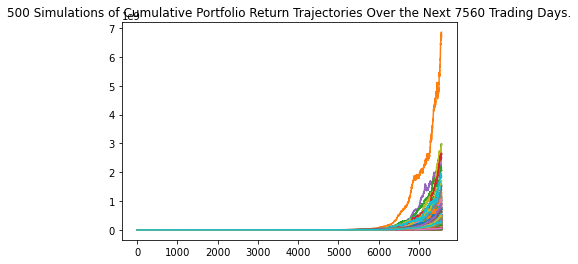

In [41]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_dist.plot_simulation()

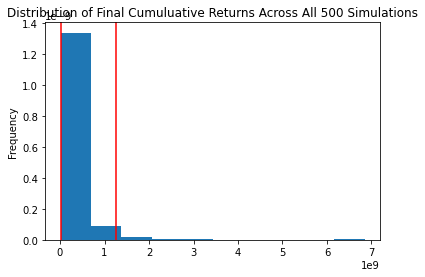

In [42]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl)

count           5.000000e+02
mean            2.872754e+08
std             4.674826e+08
min             1.138971e+07
25%             8.005543e+07
50%             1.602797e+08
75%             3.044591e+08
max             6.851546e+09
95% CI Lower    2.130561e+07
95% CI Upper    1.253081e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $426112280052.73 and $25061620256922.96


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [46]:
# Set initial investment
initial_investment = 20000 * 1.5
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*initial_investment_new,2)
ci_upper = round(tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $639168420079.09 and $37592430385384.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_dist_2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [48]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_dist_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017080,1.013786,1.000625,0.994555,1.002886,1.019791,0.998085,0.970754,0.988981,1.002515,...,1.019729,0.999341,1.007926,0.989357,1.022788,0.983040,1.009637,0.997026,0.996921,0.995210
2,1.043188,1.025293,0.996288,0.993135,1.017495,1.004321,0.988753,0.977367,0.989605,1.021592,...,1.031808,0.984680,0.994911,0.998525,1.007574,0.981995,1.001950,1.014276,1.004508,1.002987
3,1.073959,1.010343,0.967580,1.000714,1.025339,1.005437,1.003960,0.959606,1.012349,1.005574,...,1.044296,0.968918,1.009951,1.010279,1.012236,0.985240,1.003467,1.011826,1.009598,0.968490
4,1.082485,1.011048,0.983807,1.018614,1.013812,1.010143,1.012605,0.953300,1.024114,1.010835,...,1.068133,0.971821,1.017193,1.013806,1.013297,0.991879,1.011107,1.008824,1.011365,0.963591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,30.716618,28.216287,19.610510,22.655788,18.273551,23.407675,25.445812,25.365493,14.593260,18.130542,...,13.108351,21.117062,27.161236,17.822990,23.679332,17.925029,18.729385,26.337086,34.048567,34.237736
1257,30.248291,28.153857,19.776803,22.606585,18.071453,23.570207,25.238954,25.123352,14.695230,18.195455,...,13.432325,20.770545,27.122666,17.555072,24.394018,18.126522,19.063242,26.590175,34.057250,34.091753
1258,30.176550,28.238965,19.980676,23.023024,18.652075,22.955602,24.673538,25.600604,14.975818,18.310215,...,13.412471,20.561875,26.754639,17.555018,24.320032,18.139160,19.553626,26.375178,34.903057,34.072403
1259,29.972899,27.364904,19.998280,23.385474,18.437216,23.142304,24.216652,25.543321,15.063256,18.231475,...,13.316527,20.283354,26.602355,17.344116,23.827008,18.394997,19.821399,26.047922,34.779483,34.300048


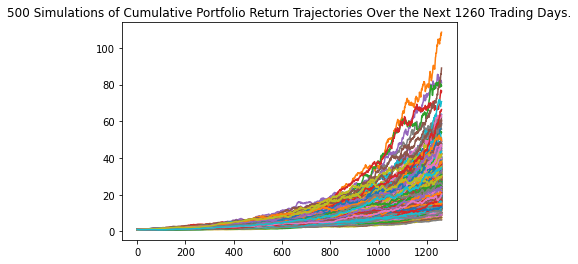

In [49]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_dist_2.plot_simulation()

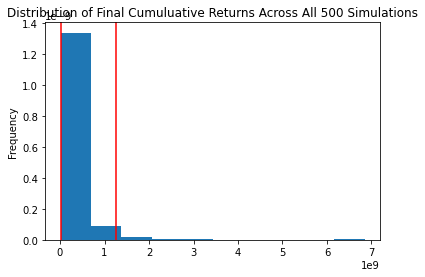

In [50]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_dist.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl_five = MC_dist_2.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl_five)

count           500.000000
mean             25.904077
std              12.770933
min               6.224747
25%              17.162354
50%              23.738867
75%              31.492397
max             108.530905
95% CI Lower      9.441443
95% CI Upper     58.855011
Name: 1260, dtype: float64


In [52]:
# Set initial investment
# YOUR CODE HERE!

initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $566486.55 and $3531300.64


### Ten Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [54]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992350,1.000888,1.000801,0.989267,1.019583,1.011203,1.015379,0.985789,0.998664,0.985979,...,0.997865,1.016416,1.011396,1.012253,1.002094,0.993082,0.985679,0.980840,1.004205,1.000882
2,0.988863,0.995581,1.011775,0.994423,1.025607,1.017243,1.037428,0.985039,0.999940,0.991434,...,1.003627,1.009902,0.993481,1.030830,1.010956,0.984825,0.975058,0.964842,1.016357,0.996034
3,1.018110,0.986939,1.019523,0.978960,1.031447,1.017236,1.058384,0.982488,0.995314,0.994508,...,0.965767,0.997008,1.003815,1.014811,1.026128,0.972273,0.970354,0.943418,1.019700,1.005843
4,1.034356,0.988726,1.044416,0.988930,1.021079,1.020512,1.055593,0.967885,0.998039,0.989286,...,0.970334,0.982617,1.002450,0.998986,1.035409,0.987408,0.964691,0.946830,1.028676,1.009925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,307.355041,963.059009,229.868275,375.262056,277.957393,397.021350,591.267687,544.845430,840.518478,1086.127902,...,1540.051390,126.659705,269.934496,942.591384,337.501133,702.886843,109.353023,1856.225711,1710.933192,409.854154
2517,303.310749,968.477220,231.136850,384.585437,268.869119,401.836392,595.691885,543.565585,852.863210,1084.615304,...,1543.345903,125.057522,276.066941,947.909193,337.820646,716.309677,111.179248,1867.321978,1687.981451,414.318350
2518,300.025231,982.166895,232.227771,388.225977,268.442206,405.873074,604.933232,544.107510,851.855289,1076.894719,...,1534.306096,124.975076,271.805439,958.262588,336.452041,732.119269,113.009605,1887.720712,1706.099884,411.544096
2519,301.939768,1001.522814,235.442414,392.234748,263.322187,404.492213,602.811346,536.745686,855.315218,1077.337447,...,1522.372530,126.911592,266.557020,990.972237,347.512696,736.999262,110.344131,1905.050093,1708.982968,402.962495


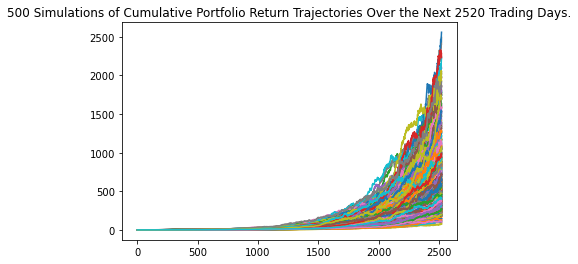

In [55]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_dist_ten.plot_simulation()

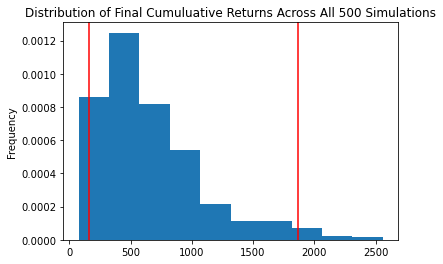

In [56]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_dist_ten.plot_distribution()

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl_ten)

count            500.000000
mean             662.877570
std              432.821390
min               75.010340
25%              359.905190
50%              549.691527
75%              849.053868
max             2559.887209
95% CI Lower     160.697746
95% CI Upper    1864.278282
Name: 2520, dtype: float64


In [58]:
# Set initial investment
# YOUR CODE HERE!

initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $9641864.74 and $111856696.92
